### Câu 1: Tạo dataframe(df) lưu trữ dataset tại đường dẫn trên( chọn cách đọc load từ internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu samples, số lượng bao nhiêu feature.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

import pandas as np

df = np.read_csv("https://raw.githubusercontent.com/datasethub/ds105/master/Model_Dataset_Lab.csv")

In [2]:
df.sample(10)

,Unnamed: 0,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,drive-wheels,price
169,128,2658,121,0.896684,0.923611,110.0,21,28,99.1,3.54,fwd,11850.0
7,115,1918,90,0.755887,0.886111,68.0,37,41,93.7,2.97,fwd,5572.0
11,106,3230,120,0.955790,0.950000,97.0,19,24,114.2,3.46,rwd,12440.0
20,66,3495,183,0.901009,0.976389,123.0,22,25,106.7,3.58,rwd,28176.0
156,27,2535,122,0.839020,0.897222,88.0,24,30,103.3,3.34,fwd,8921.0
159,1,2548,130,0.811148,0.890278,111.0,21,27,88.6,3.47,rwd,16500.0
33,130,2707,121,0.896684,0.923611,110.0,21,28,99.1,2.54,fwd,15040.0
0,23,1967,90,0.755887,0.886111,68.0,31,38,93.7,2.97,fwd,6229.0
6,171,2414,122,0.843825,0.923611,92.0,27,32,102.4,3.31,fwd,9988.0
114,116,2128,98,0.755887,0.886111,102.0,24,30,93.7,3.03,fwd,7957.0


In [3]:
df.shape

(180, 12)

Dataset có 180 samples và 12 feature

### Câu 2: Kiểm tra kiểu dữ liệu của các feature trong dataset. Dataset có bị khuyết giá trị nào không?

In [4]:
df.dtypes

Unnamed: 0        int64
curb-weight       int64
engine-size       int64
length          float64
width           float64
horsepower      float64
city-mpg          int64
highway-mpg       int64
wheel-base      float64
bore            float64
drive-wheels     object
price           float64
dtype: object

In [5]:
df.isnull().sum()

Unnamed: 0      0
curb-weight     0
engine-size     0
length          0
width           0
horsepower      0
city-mpg        0
highway-mpg     0
wheel-base      0
bore            0
drive-wheels    0
price           0
dtype: int64

Dataset không bị khuyết giá trị nào

### Câu 3: Phát triển mô hình hồi quy đơn biến cho từng feature sau 'curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'.

In [6]:
from sklearn.linear_model import LinearRegression
def linear_model(X_value, y_value, predict_value):
    """X_value, y_value, predict_value : DataFrame"""
    model = LinearRegression()
    X = X_value
    y = y_value
    if len(predict_value.columns) < len(X.columns):
        X = predict_value
        model.fit(X, y)
        yhat = model.predict(X)
    elif len(predict_value.columns) == len(X.columns):
        model.fit(X, y)
        yhat = model.predict(X)
    else:
        return False
    return X, y, model, yhat

In [7]:
X_curb, Y_curb, model_curb, yhat_curb = linear_model(df[['curb-weight']], df[['price']], df[['curb-weight']])
X_engine, Y_engine, model_engine, yhat_engine = linear_model(df[['engine-size']], df[['price']], df[['engine-size']])
X_length, Y_length, model_length, yhat_length = linear_model(df[['length']], df[['price']], df[['length']])
X_width, Y_width, model_width, yhat_width = linear_model(df[['width']], df[['price']], df[['width']])
X_horsepower, Y_horsepower, model_horsepower, yhat_horsepower = linear_model(df[['horsepower']], df[['price']], df[['horsepower']])
X_city, Y_city, model_city, yhat_city = linear_model(df[['city-mpg']], df[['price']], df[['city-mpg']])
X_highway, Y_highway, model_highway, yhat_highway = linear_model(df[['highway-mpg']], df[['price']], df[['highway-mpg']])
X_wheel, Y_wheel, model_wheel, yhat_wheel = linear_model(df[['wheel-base']], df[['price']], df[['wheel-base']])
X_bore, Y_bore, model_bore, yhat_bore = linear_model(df[['bore']], df[['price']], df[['bore']])

### Câu 4 : Phát họa regression plot cho các feature sau 'curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'.

In [8]:
df.columns

Index(['Unnamed: 0', 'curb-weight', 'engine-size', 'length', 'width',
       'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore',
       'drive-wheels', 'price'],
      dtype='object')

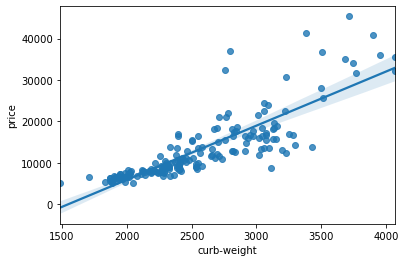

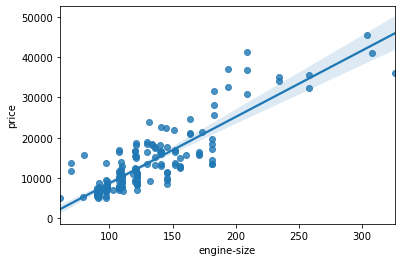

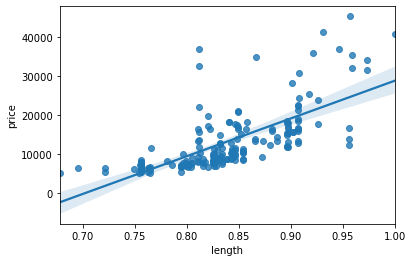

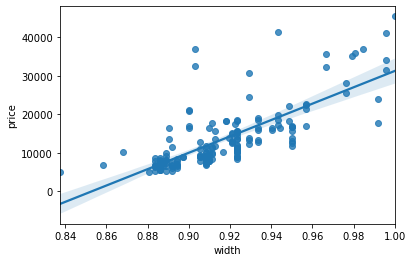

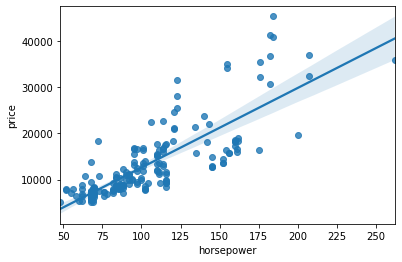

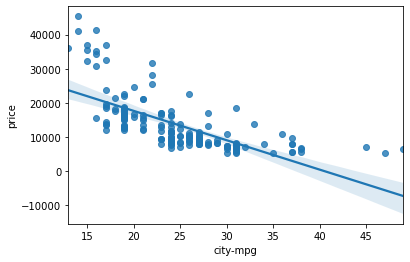

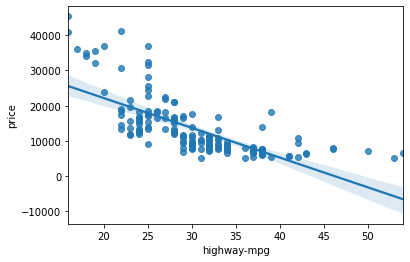

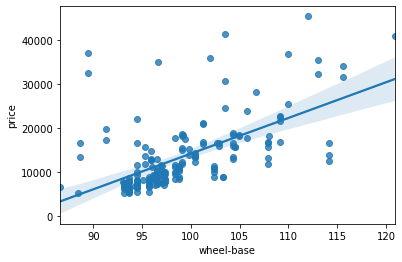

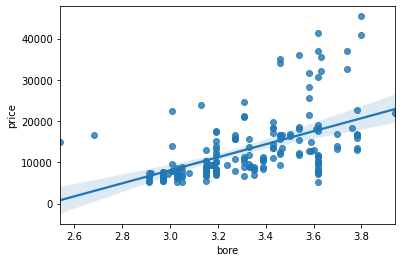

In [9]:
import seaborn as sns

#plt.figure(figsize=(20, 10))
#plt.subplot(1, 9, 1)
sns.regplot(x=df.columns[1], y='price', data=df[[df.columns[1], 'price']])
plt.show()
#plt.subplot(1, 9, 2)
sns.regplot(x=df.columns[2], y='price', data=df[[df.columns[2], 'price']])
plt.show()
#plt.subplot(1, 9, 3)
sns.regplot(x=df.columns[3], y='price', data=df[[df.columns[3], 'price']])
plt.show()
#plt.subplot(1, 9, 4)
sns.regplot(x=df.columns[4], y='price', data=df[[df.columns[4], 'price']])
plt.show()
#plt.subplot(1, 9, 5)
sns.regplot(x=df.columns[5], y='price', data=df[[df.columns[5], 'price']])
plt.show()
#plt.subplot(1, 9, 6)
sns.regplot(x=df.columns[6], y='price', data=df[[df.columns[6], 'price']])
plt.show()
#plt.subplot(1, 9, 7)
sns.regplot(x=df.columns[7], y='price', data=df[[df.columns[7], 'price']])
plt.show()
#plt.subplot(1, 9, 8)
sns.regplot(x=df.columns[8], y='price', data=df[[df.columns[8], 'price']])
plt.show()
#plt.subplot(1, 9, 9)
sns.regplot(x=df.columns[9], y='price', data=df[[df.columns[9], 'price']])
plt.show()

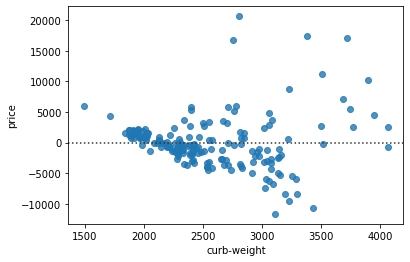

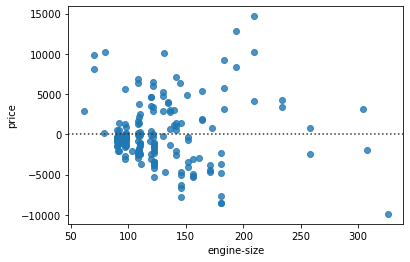

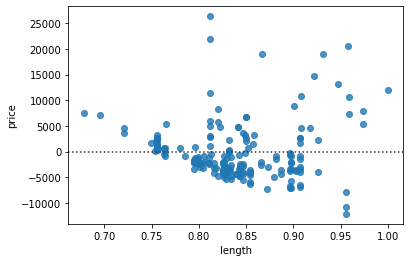

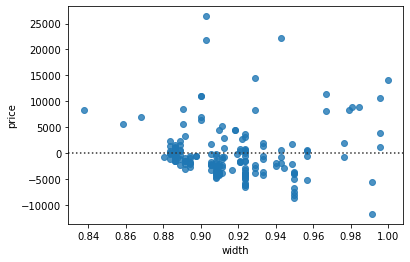

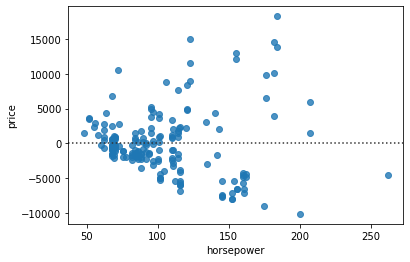

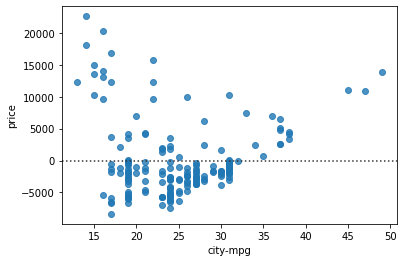

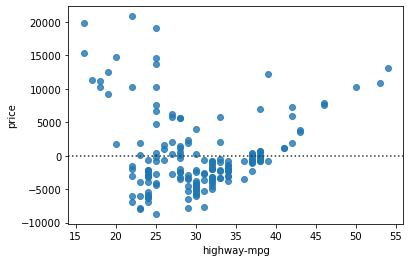

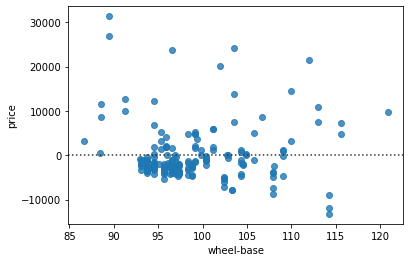

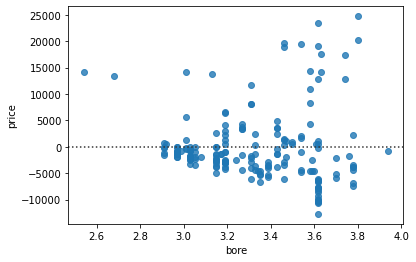

In [10]:
sns.residplot(df.iloc[:, 1], df['price'])
plt.show()
sns.residplot(df.iloc[:, 2], df['price'])
plt.show()
sns.residplot(df.iloc[:, 3], df['price'])
plt.show()
sns.residplot(df.iloc[:, 4], df['price'])
plt.show()
sns.residplot(df.iloc[:, 5], df['price'])
plt.show()
sns.residplot(df.iloc[:, 6], df['price'])
plt.show()
sns.residplot(df.iloc[:, 7], df['price'])
plt.show()
sns.residplot(df.iloc[:, 8], df['price'])
plt.show()
sns.residplot(df.iloc[:, 9], df['price'])
plt.show()

### Câu 5: Dựa vào regression plot của câu 4, chuẩn đoán xem feature nào có thể phát triển theo phương pháp hồi quy tuyến tính? Giải thích lý do.

Feature có thể phát triển theo phương pháp hồi quy tuyến tính:
* curb-weight : Không thể vì residual plot không trải ra ngẫu nhiên quanh trục x, có thể ở dạng phi tuyến
* engine-size : Không thể vì residual plot không trải ra ngẫu nhiên quanh trục x, có thể ở dạng phi tuyến
* lenght : Không thể vì residual plot không trải ra ngẫu nhiên quanh trục x, có thể ở dạng phi tuyến
* width : Không thể vì residual plot không trải ra ngẫu nhiên quanh trục x, có thể ở dạng phi tuyến
* horsepower : Không thể vì residual plot ở dạng rời rạc, có thể trở thành phi tuyến
* city-mpg : Có thể vì residual plot trải ra xung quanh trục x, đường hồi quy ở dạng tương đối fit.
* highway-mpg : Có thể vì residual plot trải ra xung quanh trục x, đường hồi quy ở dạng tương đối fit.
* wheel-base : Có thể vì residual plot trải ra xung quanh trục x, đường hồi quy ở dạng tương đối fit.
* bore : Có thể vì residual plot trải ra xung quanh trục x, đường hồi quy ở dạng tương đối fit.

### Câu 6 : Xây dựng mô hình hồi quy đa biến cho các feature sau 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'.

In [11]:
X_multy, y_multy, model_multy, yhat_multy = linear_model(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], df[['price']], df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [12]:
model_multy.intercept_, model_multy.coef_

(array([-15629.37781476]),
 array([[46.31113134,  4.92709318, 82.78420228, 29.03220964]]))

### Câu 8: Xây dựng mô hình hồi quy đa biến cho các feature được cho là quan trọng.

In [13]:
X_multy_importance, y_multy_importance, model_multy_importance, yhat_multy_importance = linear_model(df[['city-mpg', 'highway-mpg', 'wheel-base', 'bore']], df[['price']], df[['city-mpg', 'highway-mpg', 'wheel-base', 'bore']])

In [14]:
model_multy_importance.intercept_, model_multy_importance.coef_

(array([-16882.509503]),
 array([[-239.01995375, -370.63507279,  390.45093156, 2651.61447188]]))

### Câu 9 : Phát họa distribution plot thể hiện giữa giá trị thực và giá trị dự đoán từ các mô hình đã xây dựng.

In [15]:
arr_yhat = [Y_curb, Y_engine, Y_length, Y_width, Y_horsepower, Y_city, Y_highway, Y_wheel, Y_bore,]
arr_y = [yhat_curb, yhat_engine, yhat_length, yhat_width, yhat_horsepower, yhat_city, yhat_highway, yhat_wheel, yhat_bore]

* Hồi quy đơn biến

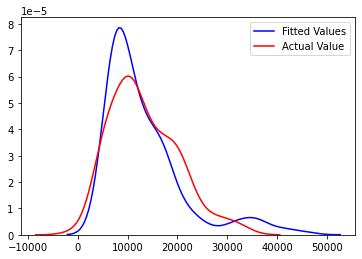

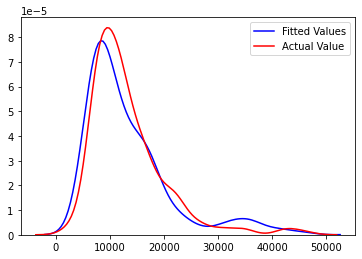

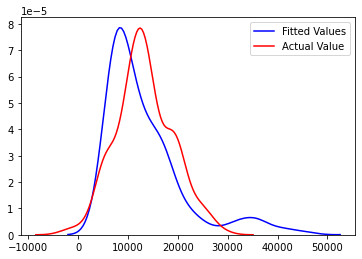

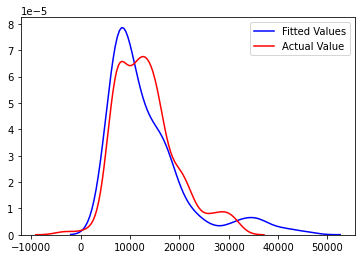

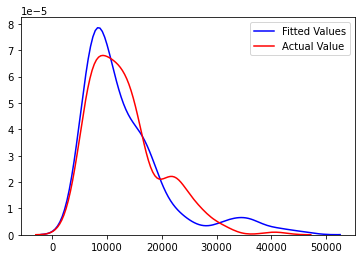

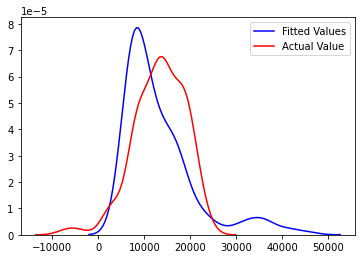

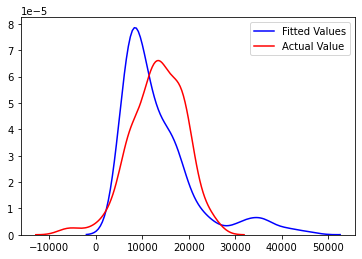

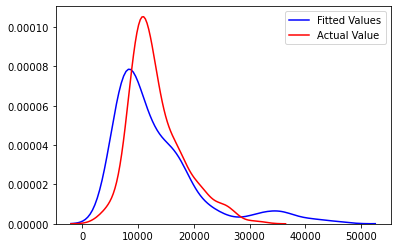

In [16]:
for i in range (0, 8):
    ax1 = sns.distplot(arr_yhat[i], hist=False, color='b', label = 'Fitted Values')
    sns.distplot(arr_y[i], hist=False, color='r', label = 'Actual Value', ax=ax1)
    plt.show()

* Hồi quy đa biến

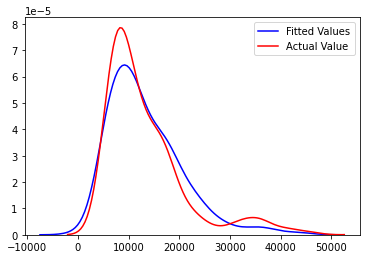

In [17]:
ax2 = sns.distplot(yhat_multy, hist=False, color='b', label = 'Fitted Values')
sns.distplot(y_multy, hist=False, color='r', label = 'Actual Value', ax=ax2)

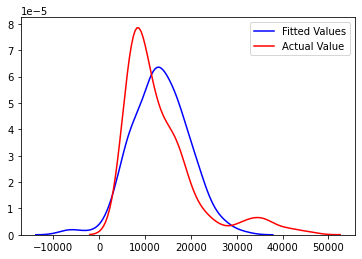

In [18]:
ax3 = sns.distplot(yhat_multy_importance, hist=False, color='b', label = 'Fitted Values')
sns.distplot(y_multy_importance, hist=False, color='r', label = 'Actual Value', ax=ax3)

### Câu 10 : Dựa vào các distribution plot và residual plot nhận xét xem các feature nào là quan trọng để phát triển mô hình.

Feature quan trọng để phát triển mô hình:

* city-mpg : có distribution plot tuy chưa thực sự khớp nhưng khá gần nhau, và residual được trải đều xung quanh trục x, vậy nên **'city-mpg'** có thể là một feature quan trọng.

### Câu 11 : Viết hàm trả về kết quả dự đoán từ một hoặc nhiều feature thuộc 'curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'.

* Predict từ một thuộc tính

In [19]:
X_11, y_11, model_11, yhat_11 = linear_model(df[['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore']], df[['price']], df[['width']])

In [20]:
yhat_11

array([[ 7085.80286591],
       [14744.52420264],
       [15039.0904079 ],
       [11798.86215005],
       [ 8853.20009746],
       [18573.88487101],
       [15039.0904079 ],
       [ 7085.80286591],
       [ 7380.36907117],
       [ 7674.93527643],
       [ 7085.80286591],
       [20635.84830782],
       [30356.53308136],
       [22108.67933411],
       [11209.72973953],
       [-3224.01431816],
       [11798.86215005],
       [22108.67933411],
       [ 7085.80286591],
       [11798.86215005],
       [26232.60620774],
       [ 8853.20009746],
       [ 7085.80286591],
       [16217.35522893],
       [26821.73861826],
       [15039.0904079 ],
       [17101.05384471],
       [ 8264.06768694],
       [ 1194.47876073],
       [12682.56076583],
       [31240.23169714],
       [ 6496.67045539],
       [ 7380.36907117],
       [15039.0904079 ],
       [20635.84830782],
       [ 7674.93527643],
       [ 6496.67045539],
       [11798.86215005],
       [20635.84830782],
       [ 8264.06768694],


* Predict từ hai thuộc tính

In [21]:
X_11_2, y_11_2, model_11_2, yhat_11_2 = linear_model(df[['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore']], df[['price']], df[['length', 'width']])

In [22]:
yhat_11_2

array([[ 6286.202273  ],
       [14692.8601453 ],
       [16107.58199239],
       [11839.49856083],
       [ 8762.14607779],
       [18571.99172825],
       [14810.79257955],
       [ 6286.202273  ],
       [ 6498.44666454],
       [ 5897.25042439],
       [ 7264.68882996],
       [22038.25357228],
       [30904.97964977],
       [22026.67701573],
       [11485.74374573],
       [-3877.39819258],
       [11969.17750212],
       [22026.67701573],
       [ 6286.202273  ],
       [11792.34258219],
       [25174.93341724],
       [ 7701.13655819],
       [ 6286.202273  ],
       [16296.37585747],
       [24797.7705633 ],
       [16107.58199239],
       [18017.69654101],
       [ 8349.44628936],
       [ 3149.47994041],
       [12146.13988492],
       [30563.22626743],
       [ 5979.60343653],
       [ 5024.82233177],
       [16107.58199239],
       [20599.9962235 ],
       [ 8101.79242621],
       [ 7276.39284937],
       [11839.49856083],
       [20599.9962235 ],
       [ 7441.69370038],
